In [6]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

## Clustering e K-Means

O algoritmo de k-médias (k-means) é um dos algoritmos mais simples de clustering. A idéia básica é a seguinte:

- Escolhe-se, a priori, um número $k$ de clusters. A escolha de um bom número de clusters é um problema não resolvido em machine learning, mas com algum conhecimento do domínio de aplicação podemos fazer boas escolhas aqui.

- Cada cluster é caracterizado por um valor de centróide (daí o nome 'k-means').

- Cada ponto do conjunto é atribuido ao cluster de seu centróide mais próximo.

Estas características do modelo k-means praticamente definem o algoritmo:

1. Inicialize os $k$ centróides aleatoriamente. Uma abordagem bastante popular é escolher $k$ pontos ao acaso dentro do dataset.

2. Enquanto não convergiu:

    2.1. Associe cada ponto ao seu centroide mais próximo
    
    2.2. Atualize cada centróide como sendo o ponto médio dos pontos a ele atribuidos.

O código abaixo demonstra a evolução dos centróides de um dataset aleatório com 3 clusters:

In [7]:
from sklearn.datasets import make_blobs

# Note que estamos ignorando os labels y - este é um problema de clustering,
# não de classificação.
X, _ = make_blobs(
    n_samples=200,
    centers=3,
    n_features=2,
    cluster_std=2.5,
    random_state=RANDOM_SEED,
)

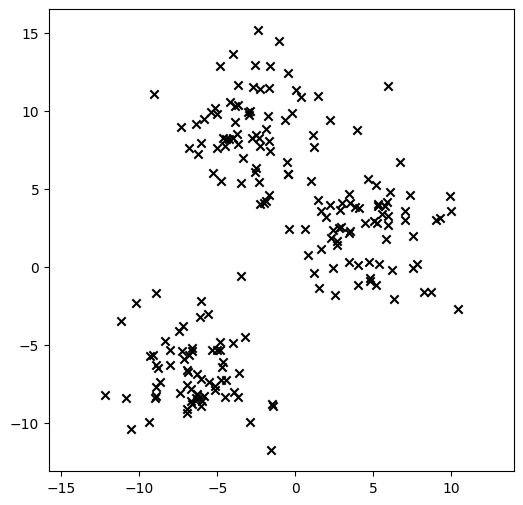

In [8]:
plt.figure(figsize=(6, 6))
plt.scatter(
    X[:, 0],
    X[:, 1],
    c='black',
    marker='x',
)
plt.axis('equal')
plt.show()

In [9]:
k = 3
num_points = X.shape[0]

# Seleciona os centroides iniciais através de sorteio de pontos do dataset.
np.random.seed(RANDOM_SEED)
idx = np.random.choice(
    num_points,
    size=(k,),
    replace=False,
)
C = X[idx, :]

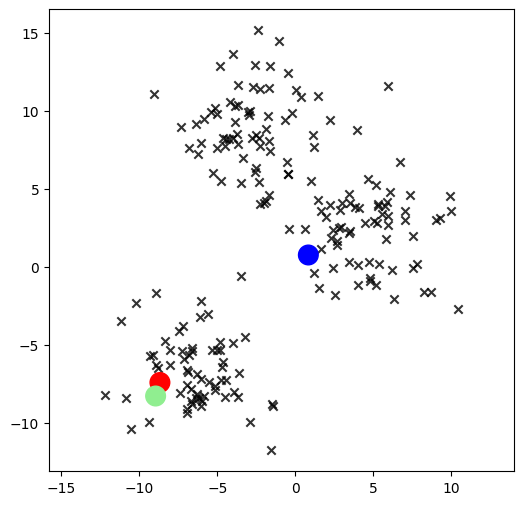

In [10]:
colors = ['red', 'lightgreen', 'blue']

plt.figure(figsize=(6, 6))
plt.scatter(
    X[:, 0],
    X[:, 1],
    c='black',
    marker='x',
    alpha=0.8,
)
plt.scatter(
    C[:, 0],
    C[:, 1],
    c=colors,
    s=200,
)
plt.axis('equal')
plt.show()

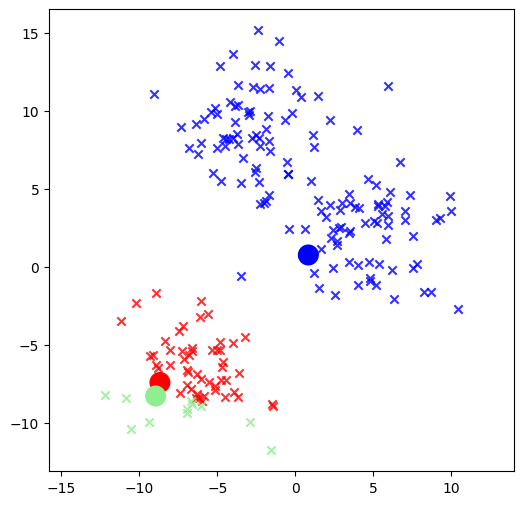

In [11]:
# Agora associa cada ponto do dataset ao seu centroide mais proximo.
def distancia(a, b):
    return np.sqrt(np.sum((a - b)**2))


def acha_mais_proximo(x, C):
    num_centroides = C.shape[0]
    mais_proximo = 0
    dist_mais_proximo = distancia(x, C[0, :])
    for j in range(1, num_centroides):
        dist = distancia(x, C[j, :])
        if dist < dist_mais_proximo:
            dist_mais_proximo = dist
            mais_proximo = j
    return mais_proximo


def atualiza_cluster(X, C):
    cluster = np.zeros(X.shape[0], dtype=int)
    for i in range(X.shape[0]):
        cluster[i] = acha_mais_proximo(X[i, :], C)
    return cluster


cluster = atualiza_cluster(X, C)

plt.figure(figsize=(6, 6))
for i in range(k):
    idx = cluster == i  # Seleciona pontos deste cluster.
    plt.scatter(
        X[idx, 0],
        X[idx, 1],
        c=colors[i],
        marker='x',
        alpha=0.8,
    )
plt.scatter(
    C[:, 0],
    C[:, 1],
    c=colors,
    s=200,
)
plt.axis('equal')
plt.show()

Antigo é bolinha, novo é diamante.


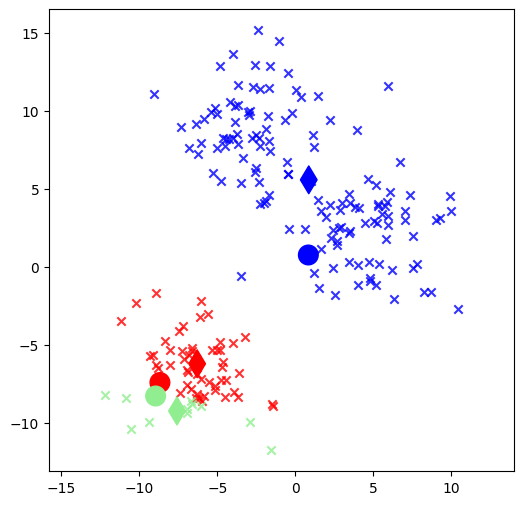

In [12]:
# Recalcula os centroides.
def recalcula_centroides(X, cluster, k):
    dims = X.shape[1]
    C = np.zeros((k, dims))
    for i in range(k):
        idx = cluster == i
        C[i, :] = X[idx, :].mean(axis=0)
    return C


C_novo = recalcula_centroides(X, cluster, k)

print('Antigo é bolinha, novo é diamante.')

plt.figure(figsize=(6, 6))
for i in range(k):
    idx = cluster == i
    plt.scatter(
        X[idx, 0],
        X[idx, 1],
        c=colors[i],
        marker='x',
        alpha=0.8,
    )
plt.scatter(
    C[:, 0],
    C[:, 1],
    c=colors,
    s=200,
)
plt.scatter(
    C_novo[:, 0],
    C_novo[:, 1],
    c=colors,
    s=200,
    marker='d',
)
plt.axis('equal')
plt.show()

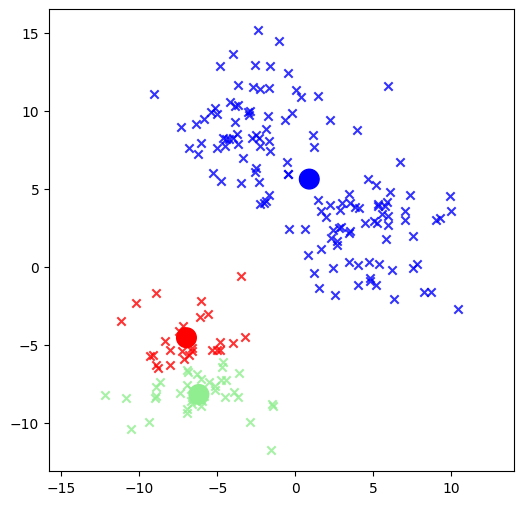

In [13]:
# Por fim, o algoritmo k-means repete o processo várias vezes.
def max_dist_pontos(C, C_novo):
    max_dist = 0.0
    for i in range(C.shape[0]):
        dist = distancia(C[i, :], C_novo[i, :])
        if dist > max_dist:
            max_dist = dist
    return max_dist


def k_means(X, k, C_init=None, max_iter=10, eps=1e-3):
    if C_init is None:
        # Seleciona os centroides iniciais.
        idx = np.random.choice(
            X.shape[0],
            size=(k,),
            replace=False,
        )
        C = X[idx, :]
    else:
        C = C_init

    for i in range(max_iter):
        cluster = atualiza_cluster(X, C)
        C_novo = recalcula_centroides(X, cluster, k)
        max_dist = max_dist_pontos(C, C_novo)
        C = C_novo
        if max_dist < eps:
            break
    return C


np.random.seed(RANDOM_SEED)
C = k_means(X, k)

cluster = atualiza_cluster(X, C)

plt.figure(figsize=(6, 6))
for i in range(k):
    idx = cluster == i
    plt.scatter(
        X[idx, 0],
        X[idx, 1],
        c=colors[i],
        marker='x',
        alpha=0.8,
    )
plt.scatter(
    C[:, 0],
    C[:, 1],
    c=colors,
    s=200,
)
plt.axis('equal')
plt.show()

Observe que o k-means convergiu, mas não para a clusterização esperada! Vamos repetir o processo com pontos iniciais mais razoáveis:

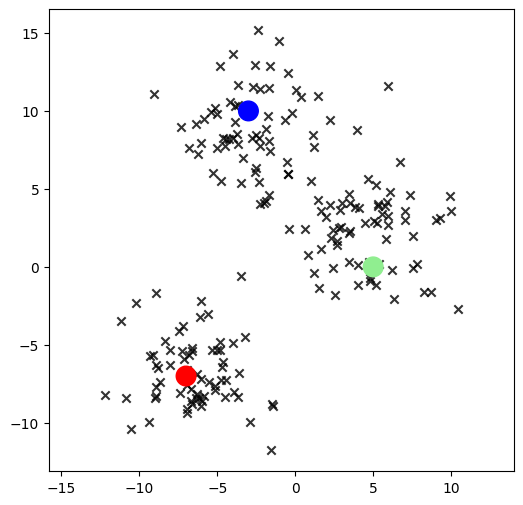

In [14]:
C = np.array([[-7, -7], [5, 0], [-3, 10]])

plt.figure(figsize=(6, 6))
plt.scatter(
    X[:, 0],
    X[:, 1],
    c='black',
    marker='x',
    alpha=0.8,
)
plt.scatter(
    C[:, 0],
    C[:, 1],
    c=colors,
    s=200,
)
plt.axis('equal')
plt.show()

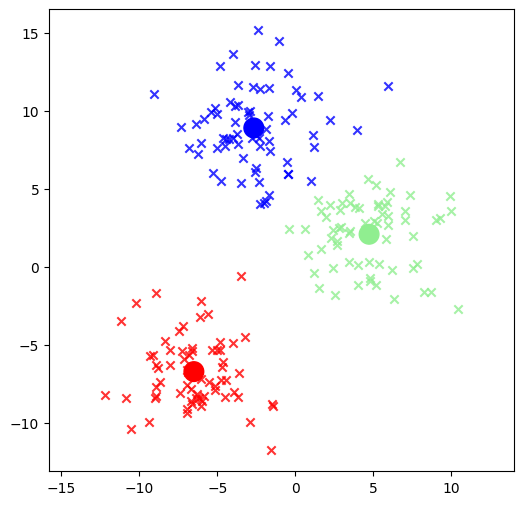

In [15]:
np.random.seed(RANDOM_SEED)
C = k_means(X, k, C_init=C)

cluster = atualiza_cluster(X, C)

plt.figure(figsize=(6, 6))
for i in range(k):
    idx = cluster == i
    plt.scatter(
        X[idx, 0],
        X[idx, 1],
        c=colors[i],
        marker='x',
        alpha=0.8,
    )
plt.scatter(
    C[:, 0],
    C[:, 1],
    c=colors,
    s=200,
)
plt.axis('equal')
plt.show()